Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import & inspect Data

In [2]:
df = pd.read_csv('datasets/coffee_analysis.csv')

In [6]:
df.head(5)

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [8]:
df.shape

(2095, 12)

Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


Find Duplicates

In [9]:
df.duplicated().sum()

0

Find & Deal with Missing value 

In [10]:
df.isna().sum()

name            0
roaster         0
roast          15
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          0
desc_2          0
desc_3          2
dtype: int64

In [17]:
df['roast'].sample(10)

753           Medium
1642    Medium-Light
608      Medium-Dark
1611    Medium-Light
2022           Light
1816    Medium-Light
1057           Light
1259    Medium-Light
185     Medium-Light
49      Medium-Light
Name: roast, dtype: object

In [19]:
df['roast'].value_counts()

Medium-Light    1490
Light            287
Medium           259
Medium-Dark       39
Dark               5
Name: roast, dtype: int64

In [3]:
df['roast'].replace(np.nan,'Medium-Light',inplace=True)

In [21]:
df['roast'].value_counts()

Medium-Light    1505
Light            287
Medium           259
Medium-Dark       39
Dark               5
Name: roast, dtype: int64

In [24]:
df['desc_3'].sample()

844    A fine decaf cup that displays much of the swe...
Name: desc_3, dtype: object

In [4]:
df['desc_3'].replace(np.nan,'A fine decaf cup that displays much of the swe...',inplace=True)

In [26]:
df.isna().sum()

name           0
roaster        0
roast          0
loc_country    0
origin_1       0
origin_2       0
100g_USD       0
rating         0
review_date    0
desc_1         0
desc_2         0
desc_3         0
dtype: int64

Find and Deal with Outliers

In [34]:
df.describe().round(2)

,100g_USD,rating
count,2095.00,2095.00
mean,9.32,93.11
std,11.43,1.56
min,0.12,84.00
25%,4.93,92.00
50%,5.86,93.00
75%,8.78,94.00
max,132.28,98.00


<AxesSubplot:>

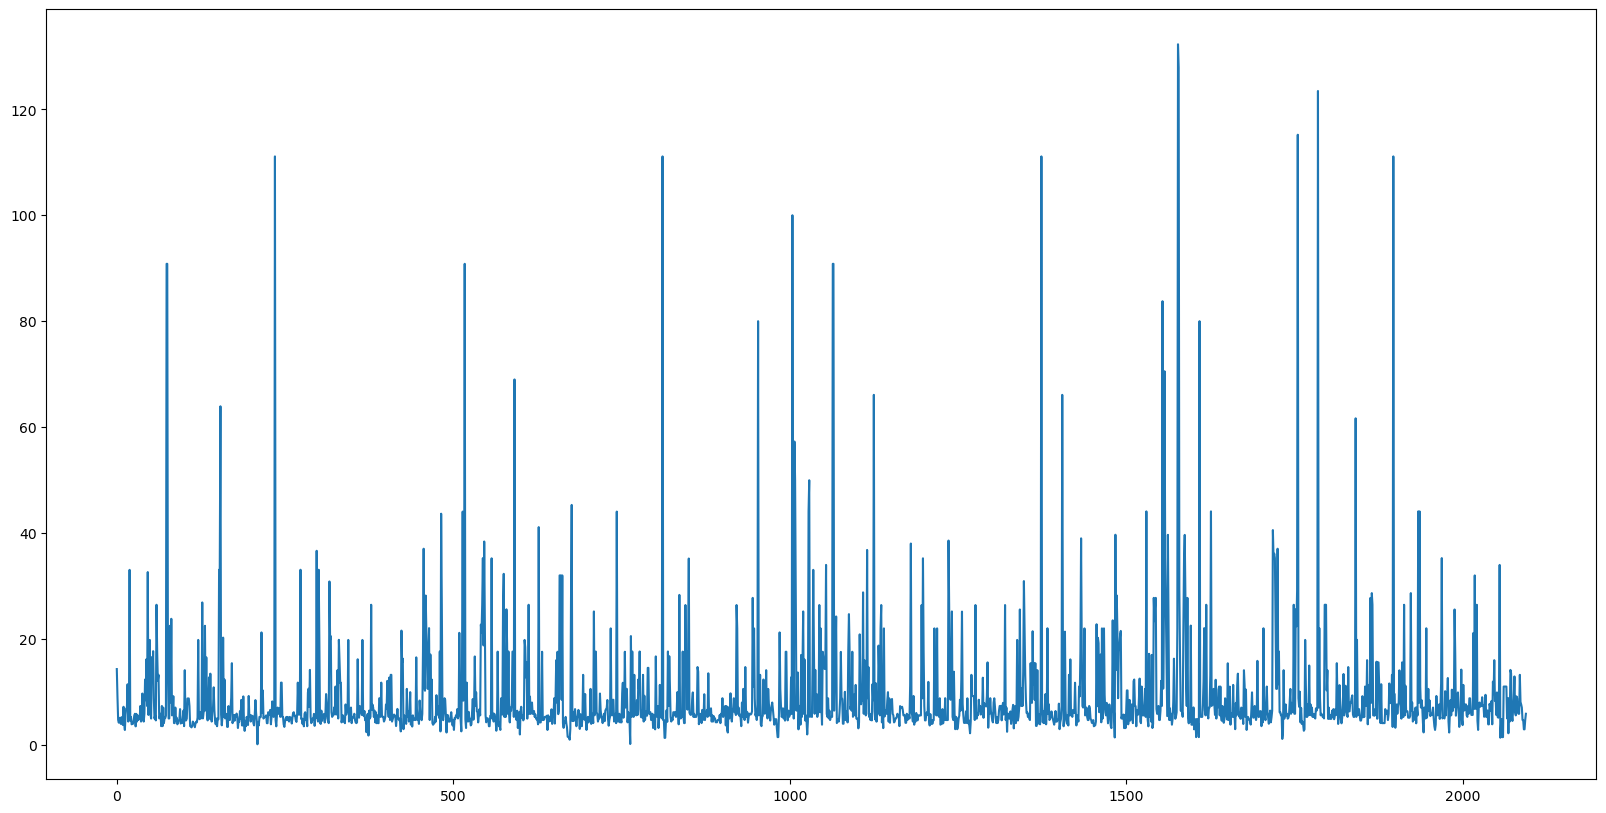

In [37]:
plt.figure(figsize=(20,10))
df['100g_USD'].plot()

Change formating of some columns

In [39]:
df['review_date'].dtype

dtype('O')

In [5]:
df['review_date'] = df['review_date'].astype('datetime64[ns]')

In [41]:
df['review_date'].dtype

dtype('<M8[ns]')

EDA

In [42]:
df.sample(8)

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
289,Ethiopia Yirgacheffe Botabaa Washed,Kakalove Cafe,Light,Taiwan,Gedeo Zone,Kochere,4.11,95,2018-10-01,"Richly sweet-tart, floral-toned. Honeysuckle, ...",Southern Ethiopia produces distinctive coffees...,"A bright, richly sweet, invitingly tart and co..."
1731,Secret Lovers Blend,Hey Brown,Medium-Light,Taiwan,Costa Rica,El Salvador,5.69,93,2022-03-01,Evaluated as espresso. Chocolaty and fruit-ton...,"A blend of coffees from Costa Rica, El Salvado...","A balanced, high-toned espresso blend animated..."
1328,Rwanda Kinini Village Natural,PT's Coffee Roasting Co.,Medium-Light,United States,Northern Province,Rwanda,6.32,94,2021-06-01,"Juicy-sweet, fruit-forward. Blueberry pie, pin...",This coffee tied for the highest rating in a c...,"A balanced, richly berry-driven natural-proces..."
709,Kona Laurina Pointu,Kona Farm Direct,Medium-Light,Hawai'i,Kona,Hawaii,25.20,94,2020-02-01,"Intricate, pungent, deeply floral. Peach, pear...","Bourbon Pointu, botanical name var. Laurina, i...",An unusual and compelling coffee: brisk but ve...
226,Costa Rica Esteban Zamora,Temple Coffee and Tea,Medium-Light,United States,Tarrazu Growing Region,Costa Rica,6.03,91,2018-08-01,"Balanced, richly sweet-savory. Lemon verbena, ...",Produced by Esteban Zamora at La Cruz de Tarra...,A classic wet-processed coffee from Costa Rica...
1247,Ethiopia Natural Guji Hambella Wate Peaberry,Kakalove Cafe,Light,Taiwan,Guji Zone,Oromia Region,5.31,95,2021-04-01,"Delicately fruit-toned, sweetly herbaceous. Dr...",Produced from trees of largely indigenous land...,An impressive example of a cleanly dried-in-th...
1132,Panama Pacamara Natural,Prairie Lily Coffee,Medium-Light,Canada,Volcan Growing Region,Western Panama,18.75,94,2021-02-01,"Rich-toned, chocolaty, fruit-centered. Chocola...",Produced at the Janson Family Farm entirely of...,"A deep, brooding, balanced Panama Pacamara cup..."
652,Berg Wu Championship Selection Yirgacheffe G1 ...,GK Coffee,Medium-Light,Taiwan,Yirgacheffe Growing Region,Southern Ethiopia,8.80,95,2020-01-01,"Musk-toned, fruit-forward. Passion fruit, fine...",Southern Ethiopia coffees like this one are la...,"A lively, engaging, cleanly fruit-toned natura..."


In [50]:
# what is the top 1 roast
df['roast'].max()

'Medium-Light'

In [49]:
# what is the buttom 1 roasts
df['roast'].min()

'Dark'

In [51]:
df.pivot_table(index='roast',values='100g_USD',aggfunc=sum)

,100g_USD
roast,
Dark,22.30
Light,3282.52
Medium,1828.29
Medium-Dark,370.72
Medium-Light,14028.51


<AxesSubplot:xlabel='roast'>

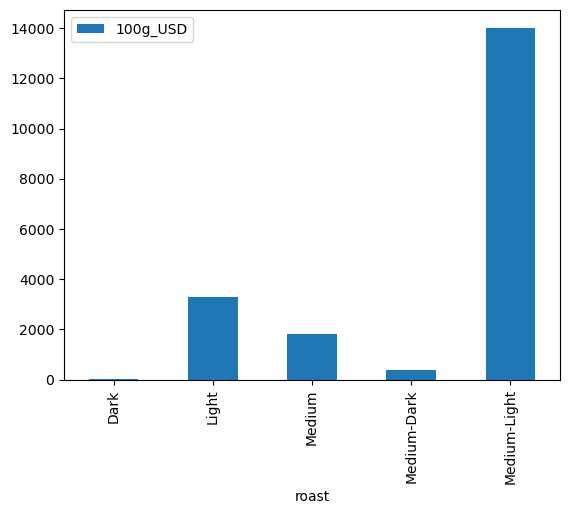

In [52]:
# get the most roasts price
df.pivot_table(index='roast',values='100g_USD',aggfunc=sum).plot(kind='bar')

In [54]:
df['roaster'].value_counts()

JBC Coffee Roasters           159
Kakalove Cafe                 141
Paradise Roasters             135
Temple Coffee Roasters         42
Bird Rock Coffee Roasters      41
                             ... 
Counter Culture Coffee          1
Fire Ridge Coffee               1
Dapper & Wise                   1
Ghost Town Coffee Roasters      1
Durango Coffee Companuy         1
Name: roaster, Length: 424, dtype: int64

In [69]:
df.pivot_table(index='loc_country',values='rating',aggfunc=np.sum).sort_values(by='rating',axis=0,ascending=False)

,rating
loc_country,
United States,124275
Taiwan,51775
Hawai'i,8122
Canada,2870
Guatemala,2634
Hong Kong,1861
Japan,1113
England,659
China,371


Text(0, 0.5, 'rating')

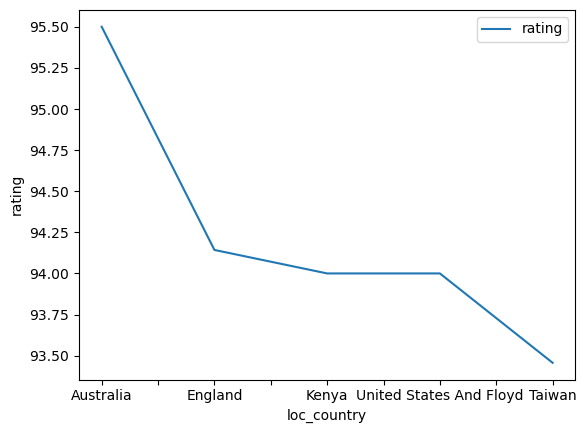

In [77]:
# get top five countries  by rating
df.pivot_table(index='loc_country',values='rating',aggfunc=np.mean).sort_values(by='rating',axis=0,ascending=False).head(5).plot(kind='line')
plt.ylabel('rating')

Text(0, 0.5, 'rating')

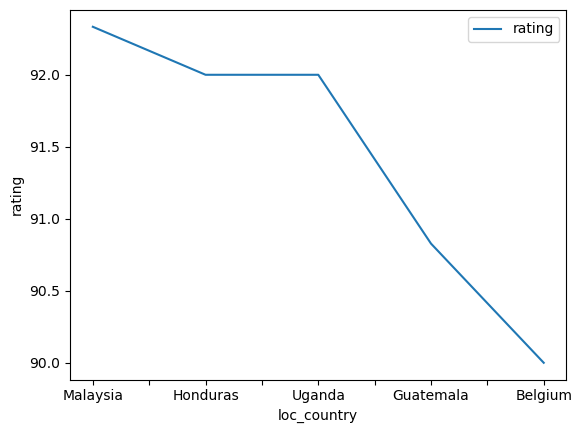

In [78]:
# get buttom five countries by rating
df.pivot_table(index='loc_country',values='rating',aggfunc=np.mean).sort_values(by='rating',axis=0,ascending=False).tail(5).plot(kind='line')
plt.ylabel('rating')

In [80]:
df['name'].nunique()

1909

In [81]:
df['name'].value_counts()

Ethiopia Kayon Mountain           6
Espresso Blend                    6
Kona Mocca®                       5
Esmeralda Estate Panama Geisha    5
Holiday Blend                     5
                                 ..
Rwanda Bumbogo                    1
Ethiopia Adame Garbota            1
Ethiopia Sidama Bombe Natural     1
Ethiopia Hassen Ware Akrabi       1
Espresso No. 3                    1
Name: name, Length: 1909, dtype: int64

Get the top and buttom five coffee names price

In [22]:
df.pivot_table(index='name',values='100g_USD',aggfunc=np.sum).sort_values(by='100g_USD',ascending=False).head(5)

,100g_USD
name,
Esmeralda Estate Panama Geisha,544.44
Mama Cata Mokkita,155.80
Kona Mocca®,150.93
Ethiopia Tamiru Tadesse Anaerobic,127.87
Ecuador Taza Dorada Finca Cruz Loma,123.46


Text(0, 0.5, 'price')

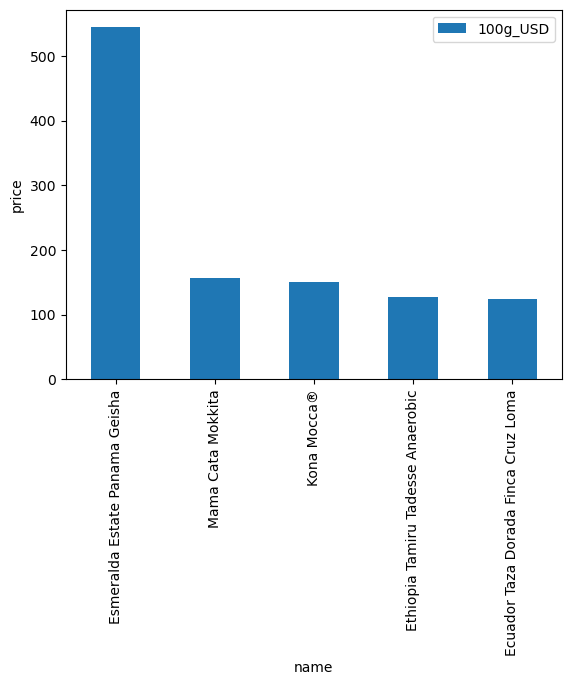

In [26]:
df.pivot_table(index='name',values='100g_USD',aggfunc=np.sum).sort_values(by='100g_USD',ascending=False).head(5).plot(kind='bar')
plt.ylabel('price')

Text(0, 0.5, 'price by$')

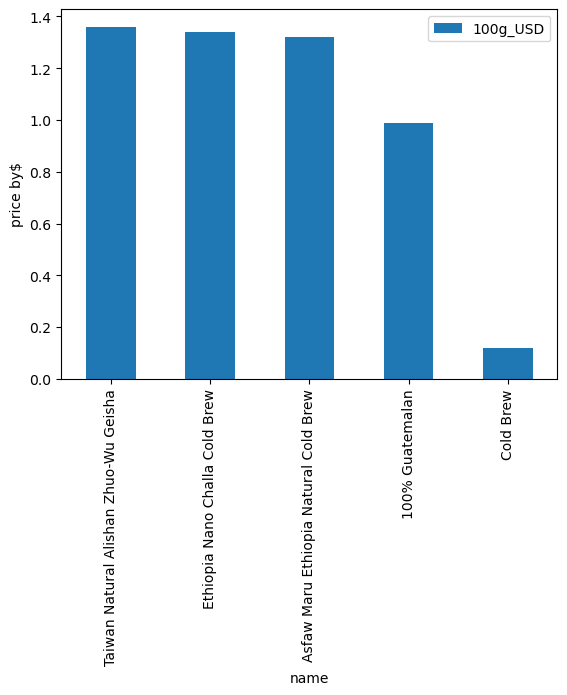

In [28]:
df.pivot_table(index='name',values='100g_USD',aggfunc=np.sum).sort_values(by='100g_USD',ascending=False).tail(5).plot(kind='bar')
plt.ylabel('price by$')

In [31]:
# the top loc countries 
df['loc_country'].value_counts().head(5)

United States    1336
Taiwan            554
Hawai'i            87
Canada             31
Guatemala          29
Name: loc_country, dtype: int64

In [34]:
df['origin_1'].value_counts()

Guji Zone                     133
Yirgacheffe Growing Region    108
Ethiopia                       77
Nyeri Growing Region           58
Holualoa                       41
                             ... 
Keramo Village                  1
Los Planes                      1
Santander                       1
Omkoi District                  1
Kisii                           1
Name: origin_1, Length: 614, dtype: int64

In [36]:
df['origin_1'].nunique()

614

Get the top & buttom 5 origins by Rating

<AxesSubplot:xlabel='origin_1'>

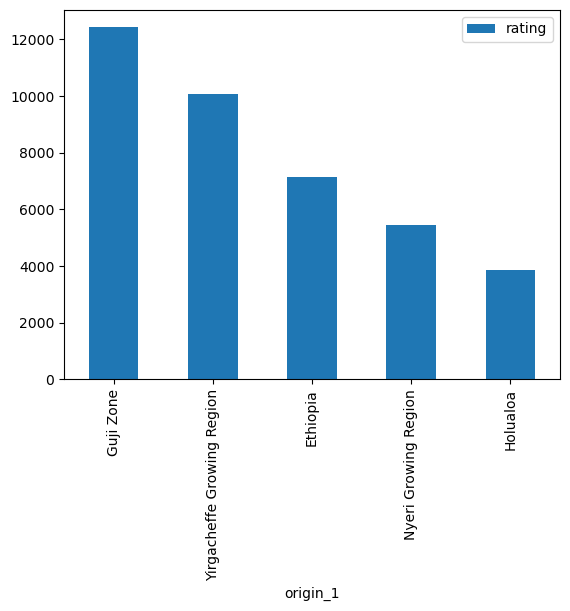

In [46]:
df.pivot_table(index='origin_1',values='rating',aggfunc=np.sum).sort_values(by='rating',ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='origin_1'>

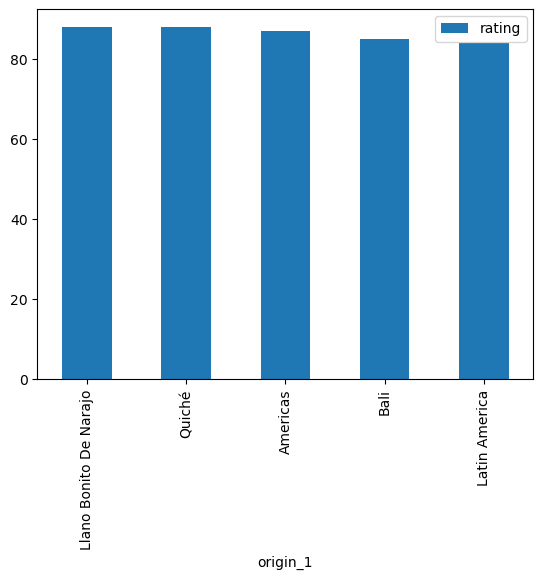

In [47]:
df.pivot_table(index='origin_1',values='rating',aggfunc=np.sum).sort_values(by='rating',ascending=False).tail(5).plot(kind='bar')

<AxesSubplot:xlabel='origin_2'>

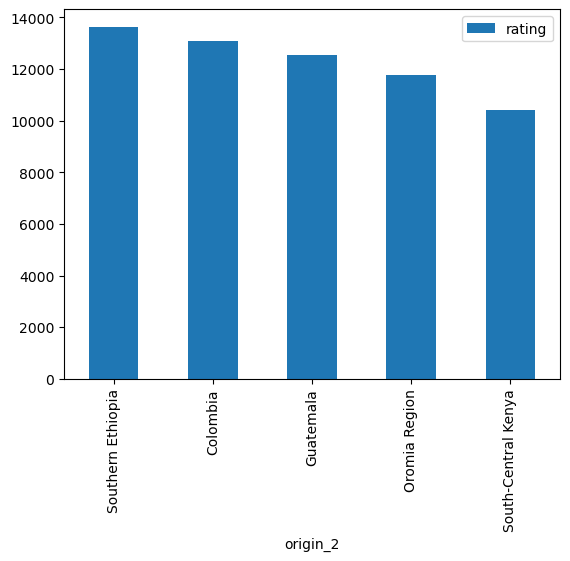

In [48]:
df.pivot_table(index='origin_2',values='rating',aggfunc=np.sum).sort_values(by='rating',ascending=False).head(5).plot(kind='bar')

<AxesSubplot:xlabel='origin_2'>

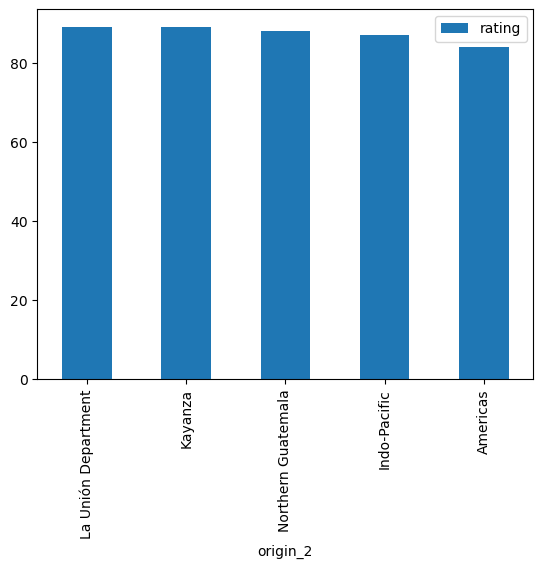

In [49]:
df.pivot_table(index='origin_2',values='rating',aggfunc=np.sum).sort_values(by='rating',ascending=False).tail(5).plot(kind='bar')

In [53]:
df['100g_USD'].max()

132.28

In [54]:
df['100g_USD'].min()

0.12

In [60]:
df['100g_USD'].mean()

9.323312649164675

In [51]:
datamodfied = df.to_csv('datamodfied.csv')